In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
!pip install twython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import missingno as msno
sns.set(style="whitegrid")


import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=0.8)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# **Import Data**

In [ ]:
true = pd.read_csv("/content/drive/MyDrive/NLP_course_AF/true.csv")
fake = pd.read_csv("/content/drive/MyDrive/NLP_course_AF/fake.csv")

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
true.duplicated().sum()

206

In [ ]:
true.drop_duplicates(inplace=True)

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
fake.duplicated().sum()

3

In [ ]:
true.drop_duplicates(inplace=True)

In [ ]:
true = true[:21000]
fake = fake[:21000]

# **Feature Enginering**

In [ ]:
true['label'] = 0
fake['label'] = 1

df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()

In [ ]:
df.columns = df.columns.str.replace('_', ' ').str.title()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Clean text
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

df['Text'] = df['Text'].apply(lambda x: clean(x))
df['Title'] = df['Title'].apply(lambda x: clean(x))


# **Exploratory Data Analysis**

## **Univariate Analysis**

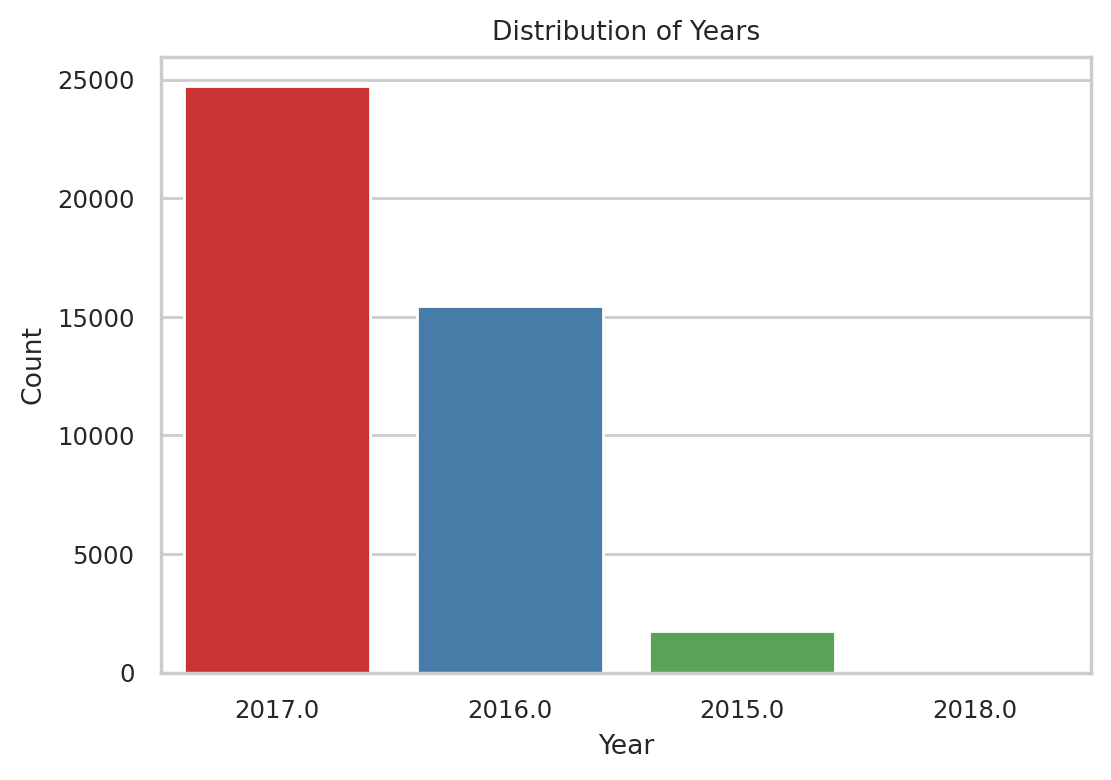

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


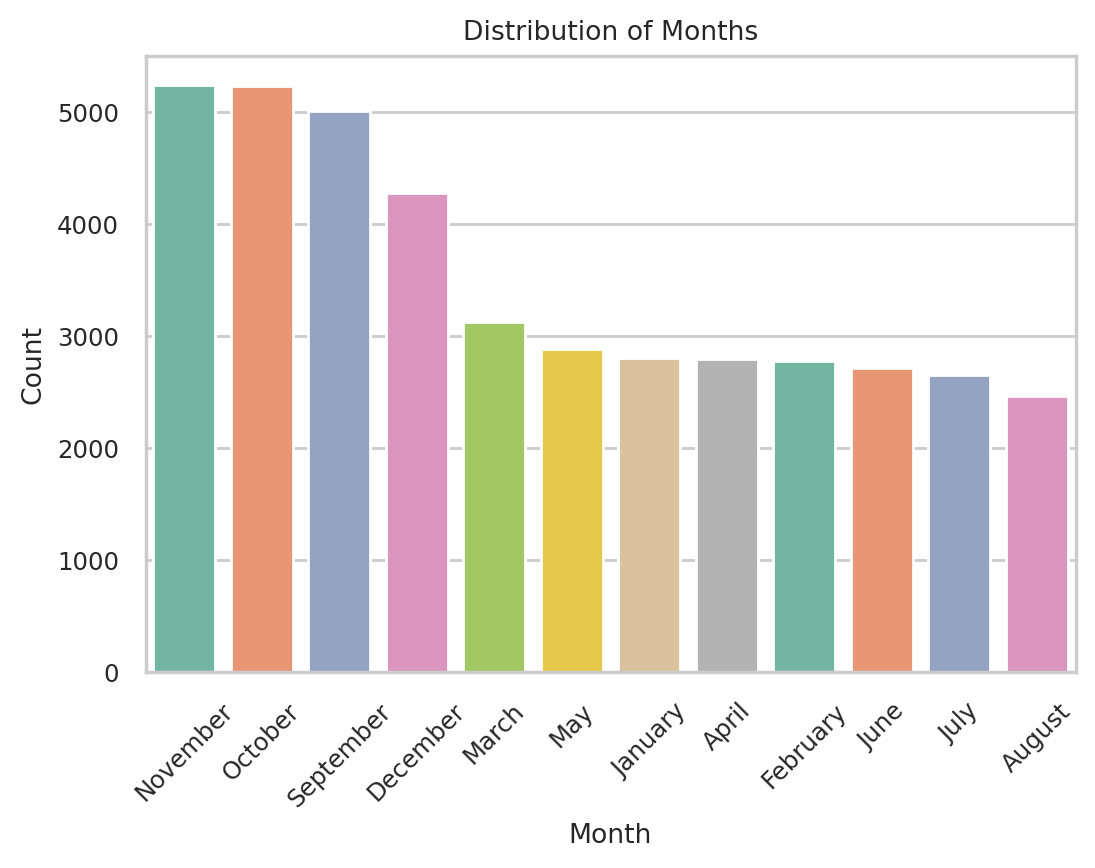

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index)
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


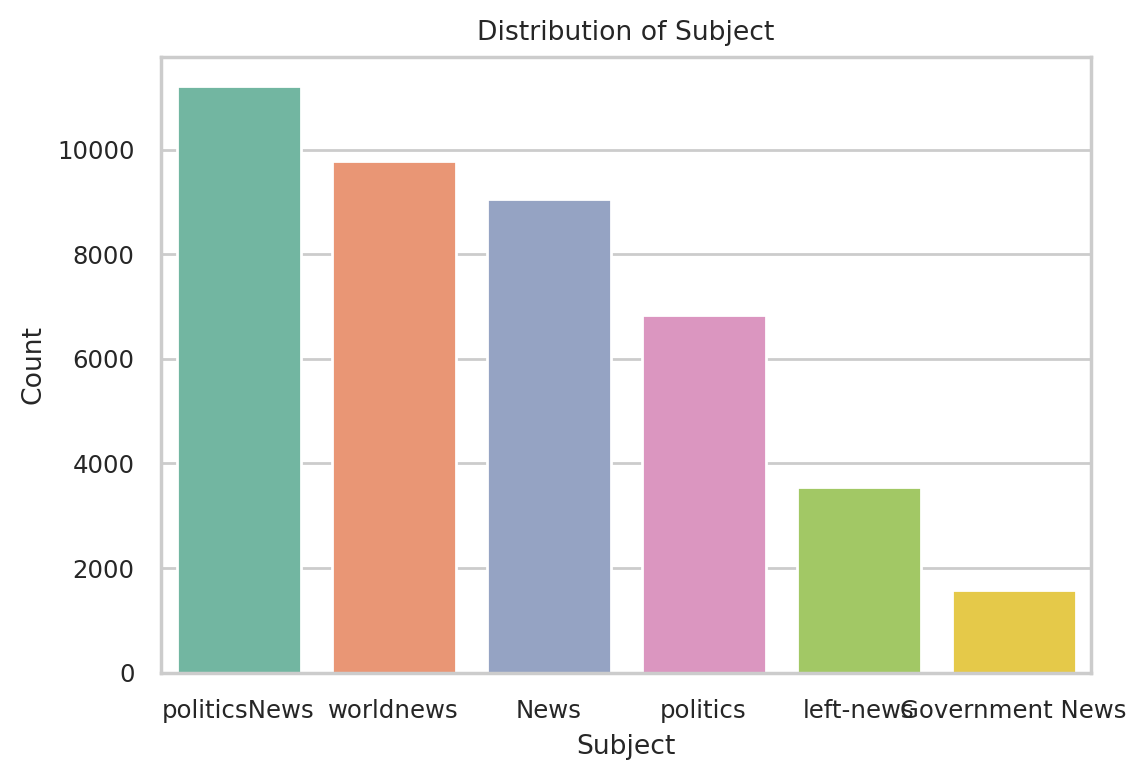

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Subject', data=df, order=df['Subject'].value_counts().index)
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## **Bivariate Analysis**

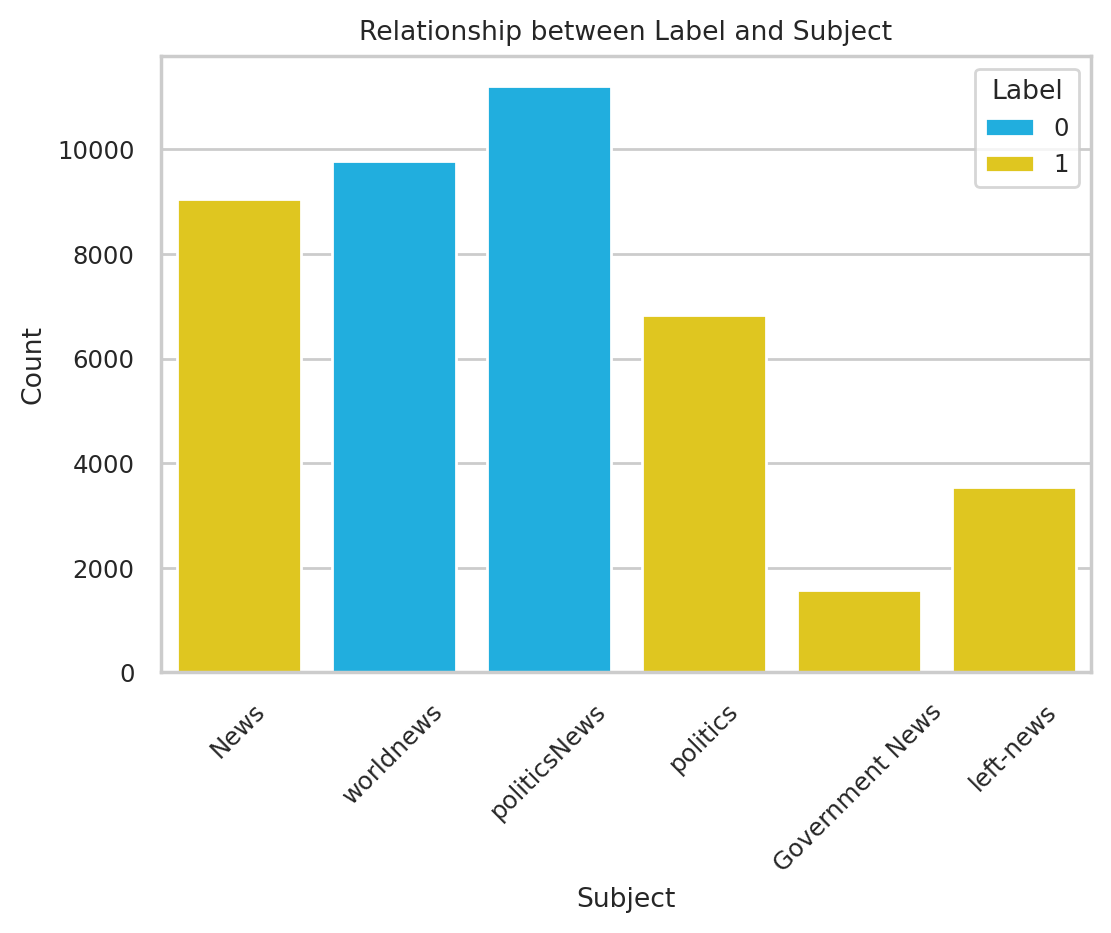

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Subject', hue='Label', data=df)
plt.title('Relationship between Label and Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

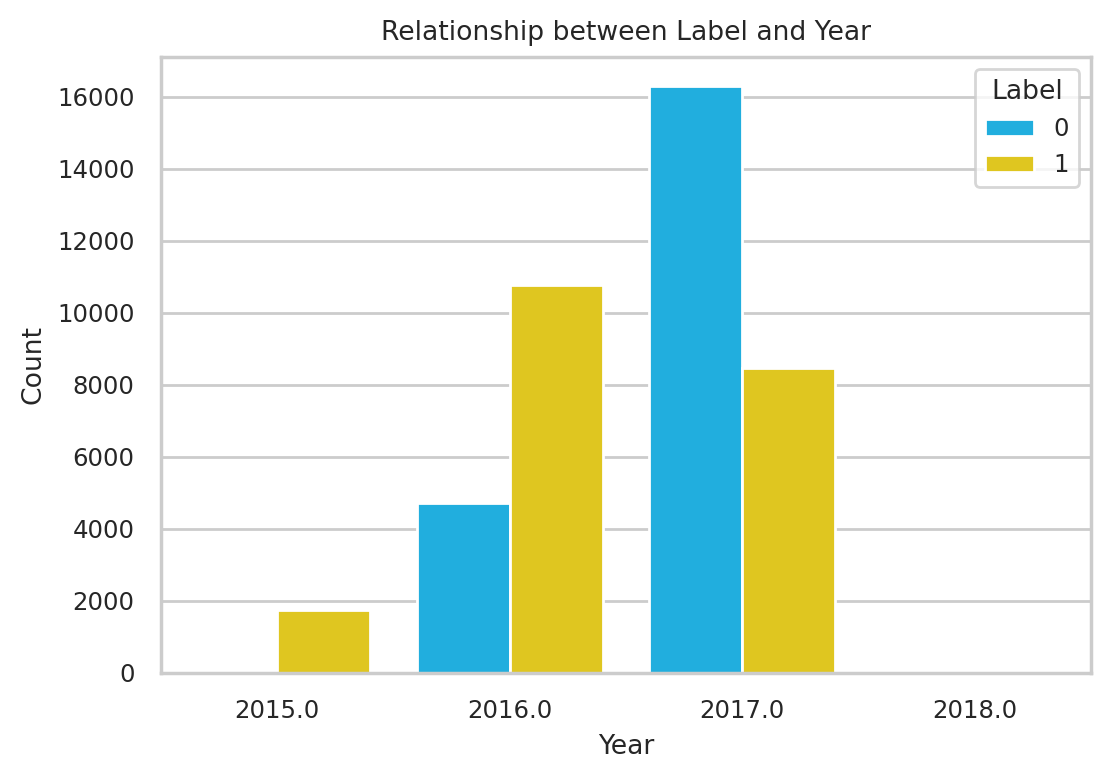

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Year', hue='Label', data=df)
plt.title('Relationship between Label and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

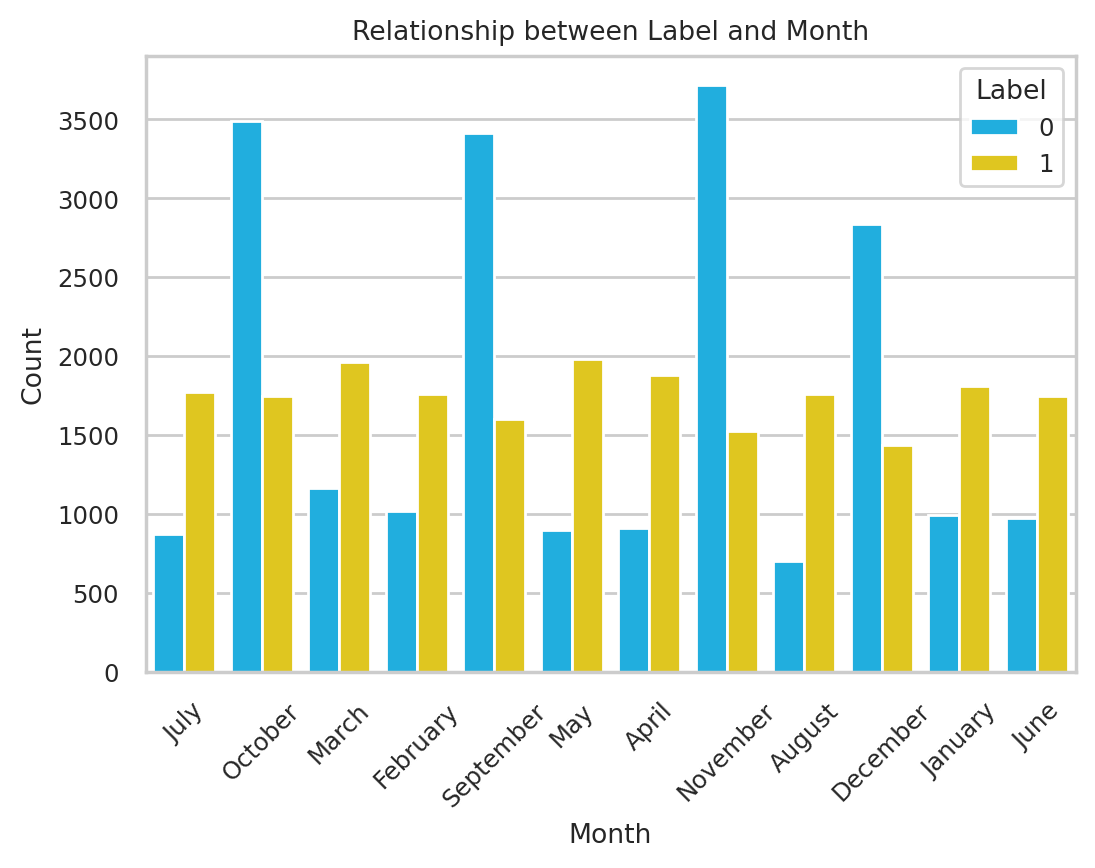

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Month', hue='Label', data=df)
plt.title('Relationship between Label and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Bigrams Text**

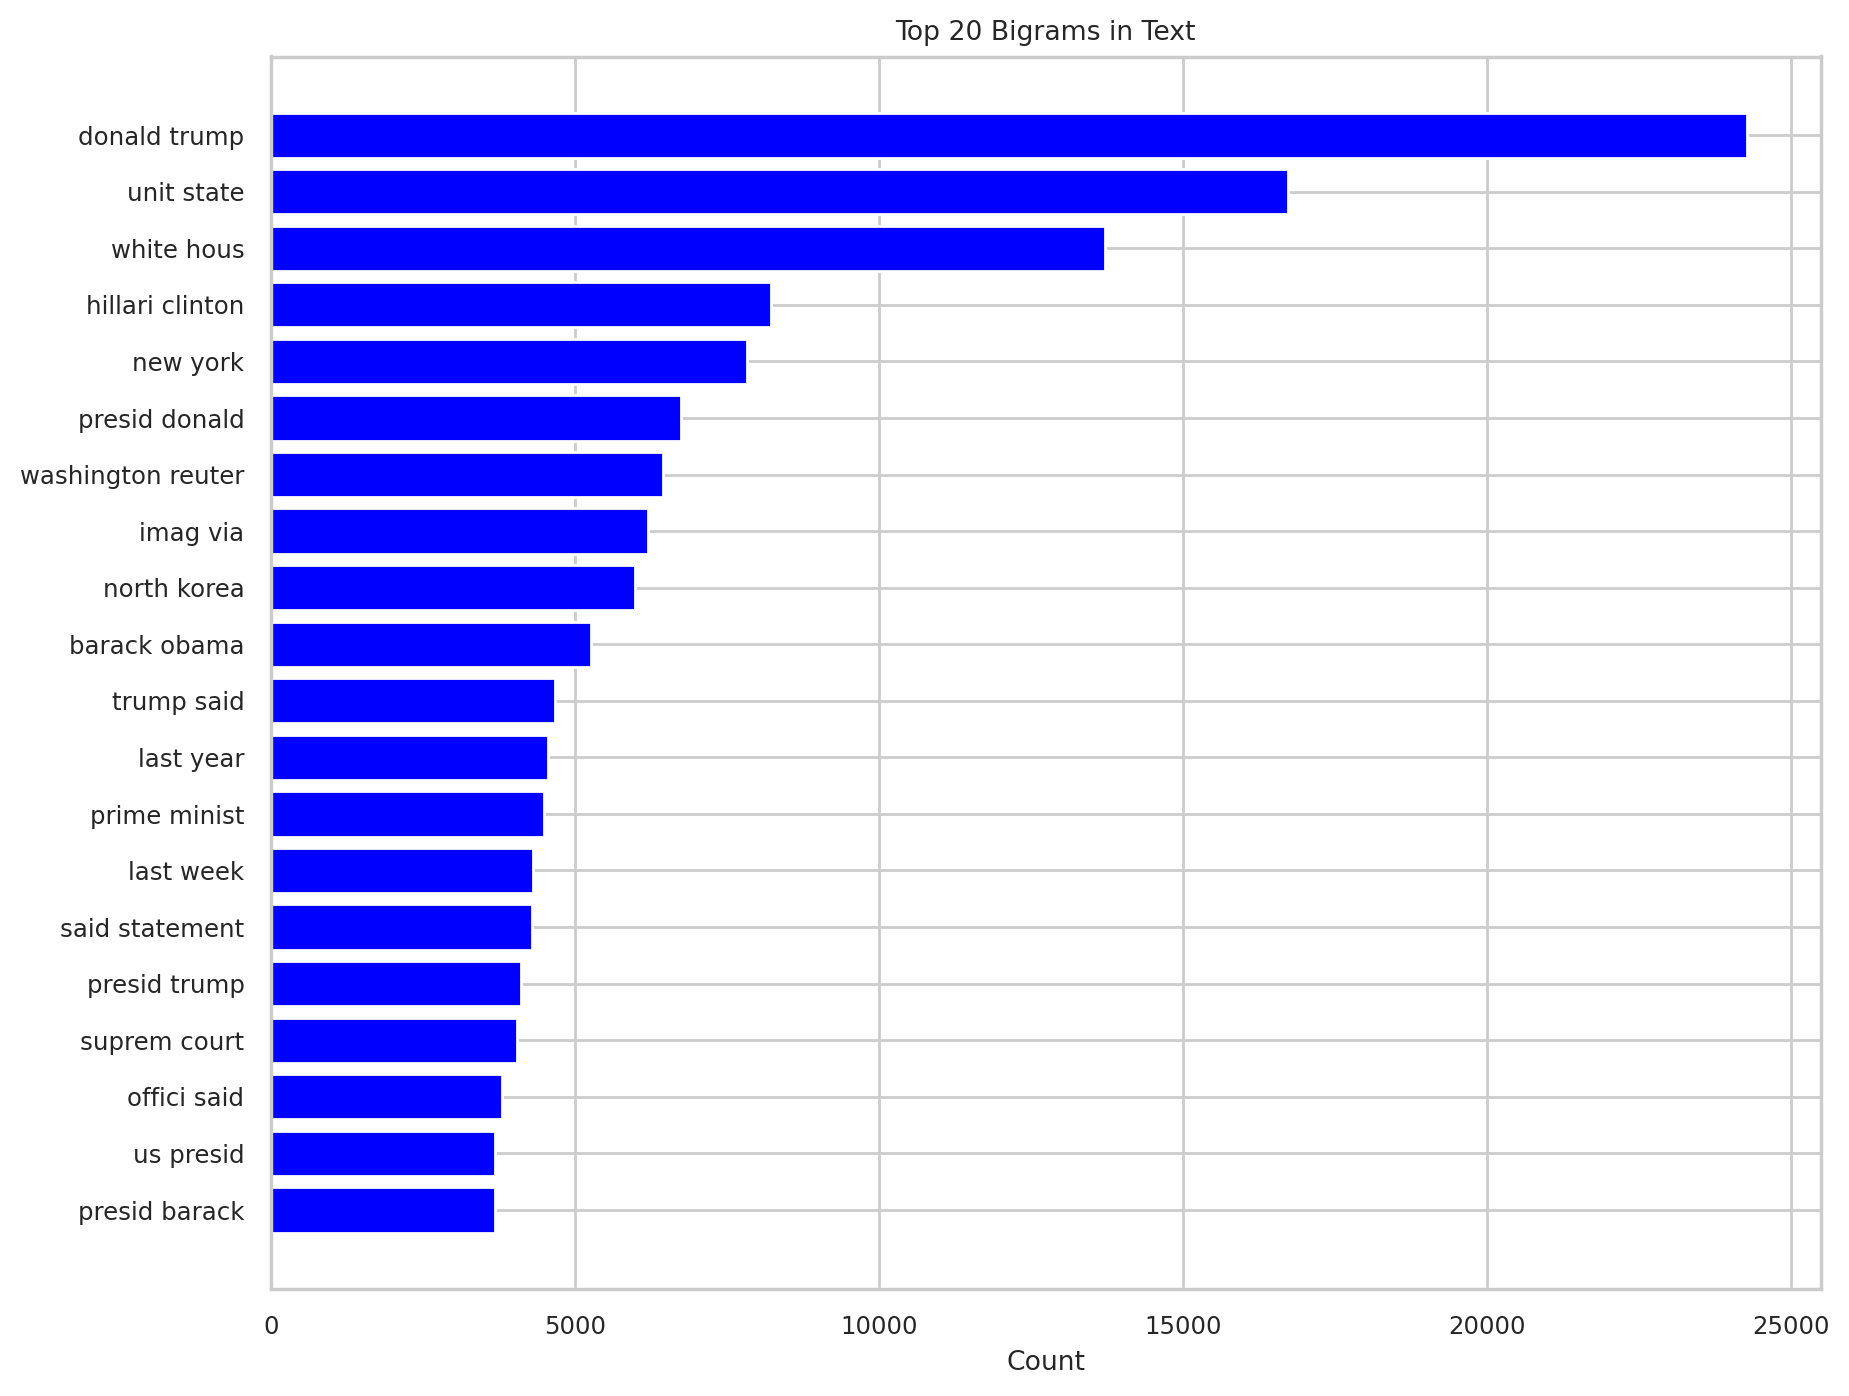

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Text'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(6, 4))
plt.barh(df_bigrams['bigram'], df_bigrams['count'])
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis()
plt.show()

## **Bigrams Title**

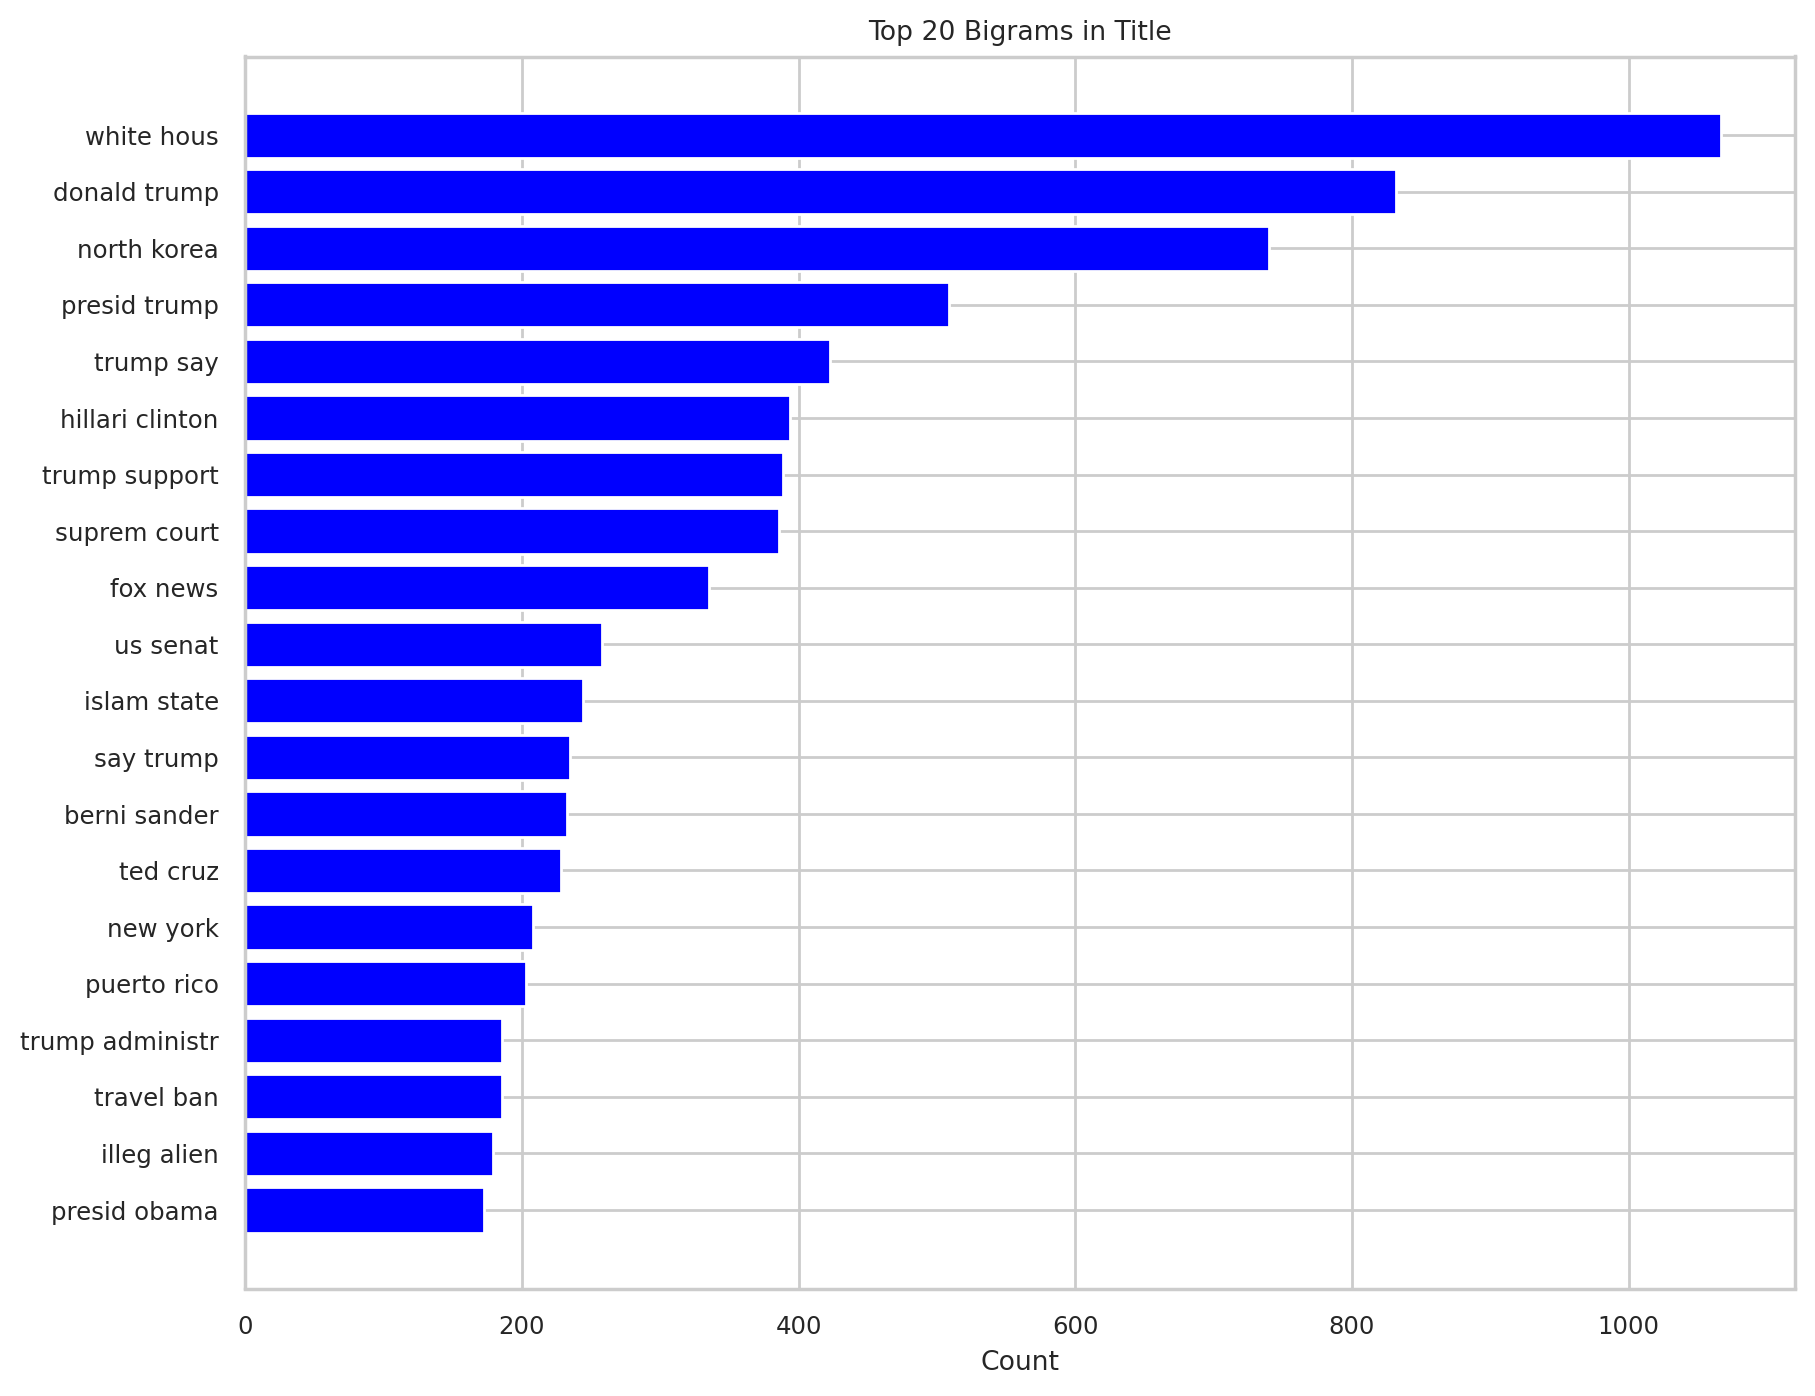

In [ ]:
common_bigrams = get_top_n_bigram(df['Title'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(6, 4))
plt.barh(df_bigrams['bigram'], df_bigrams['count'])
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Title')
plt.gca().invert_yaxis()
plt.show()

# **Sentiment Analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
res = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc="Sentiment Analysis"):
    text = row['Text']
    my_id = row['Title']
    res[my_id] = sia.polarity_scores(text)

Sentiment Analysis:   0%|          | 0/42000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Title'})
vaders = vaders.merge(df, how='left')

In [ ]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

vaders['sentiment'] = vaders['compound'].apply(lambda val: polarity_score(val))

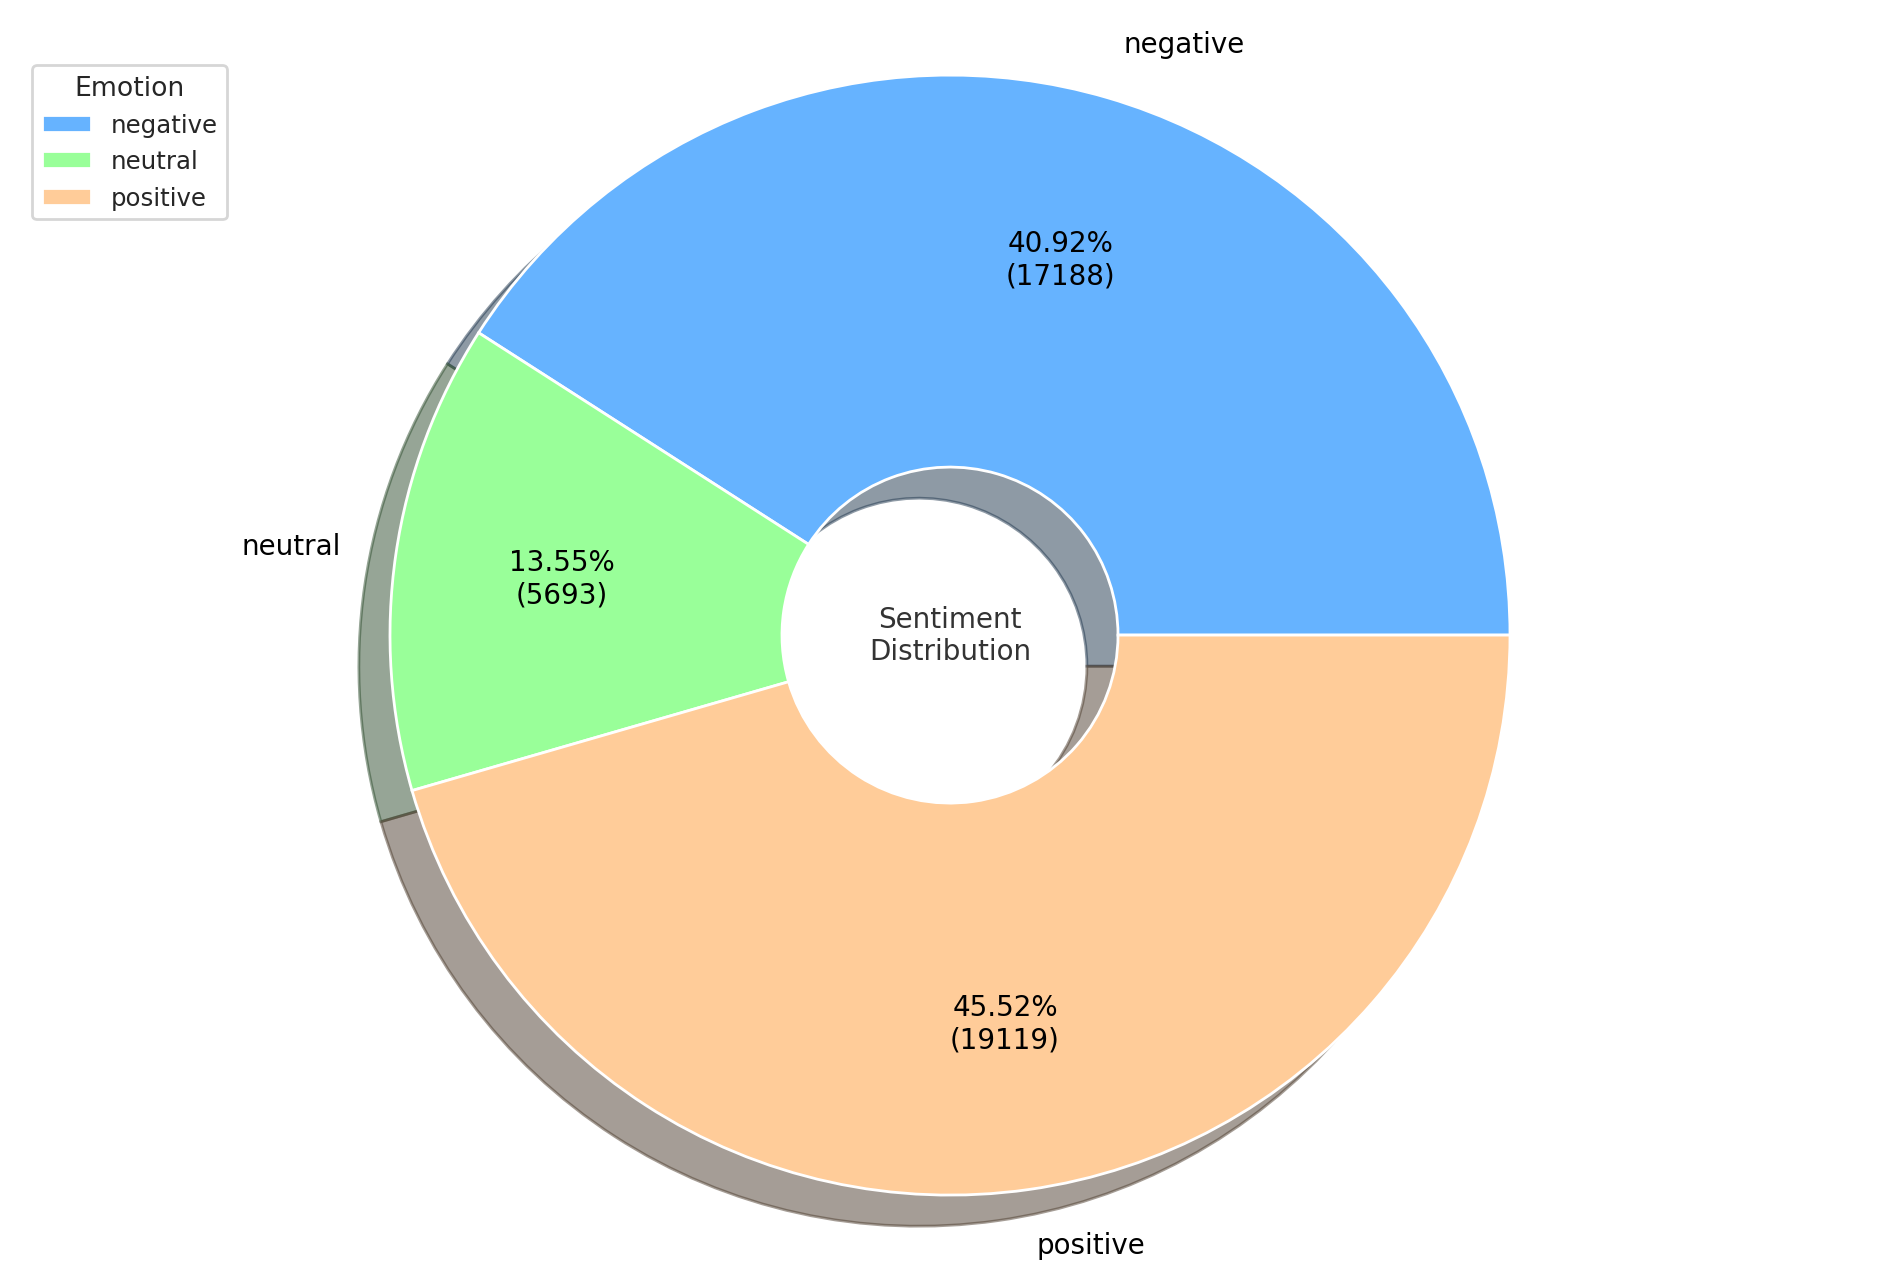

In [ ]:
unique_emotion = vaders['sentiment'].unique()

explode = [0] * len(unique_emotion)

emotion_counts = vaders.groupby("sentiment").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=emotion_counts,
    labels=emotion_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(emotion_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

# center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
# fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=10, fontweight='light', color='#333333')

ax.legend(emotion_counts.index, title="Emotion", loc="center left", bbox_to_anchor=(0, 0, 0, 1.8))

ax.axis('equal')

plt.show()

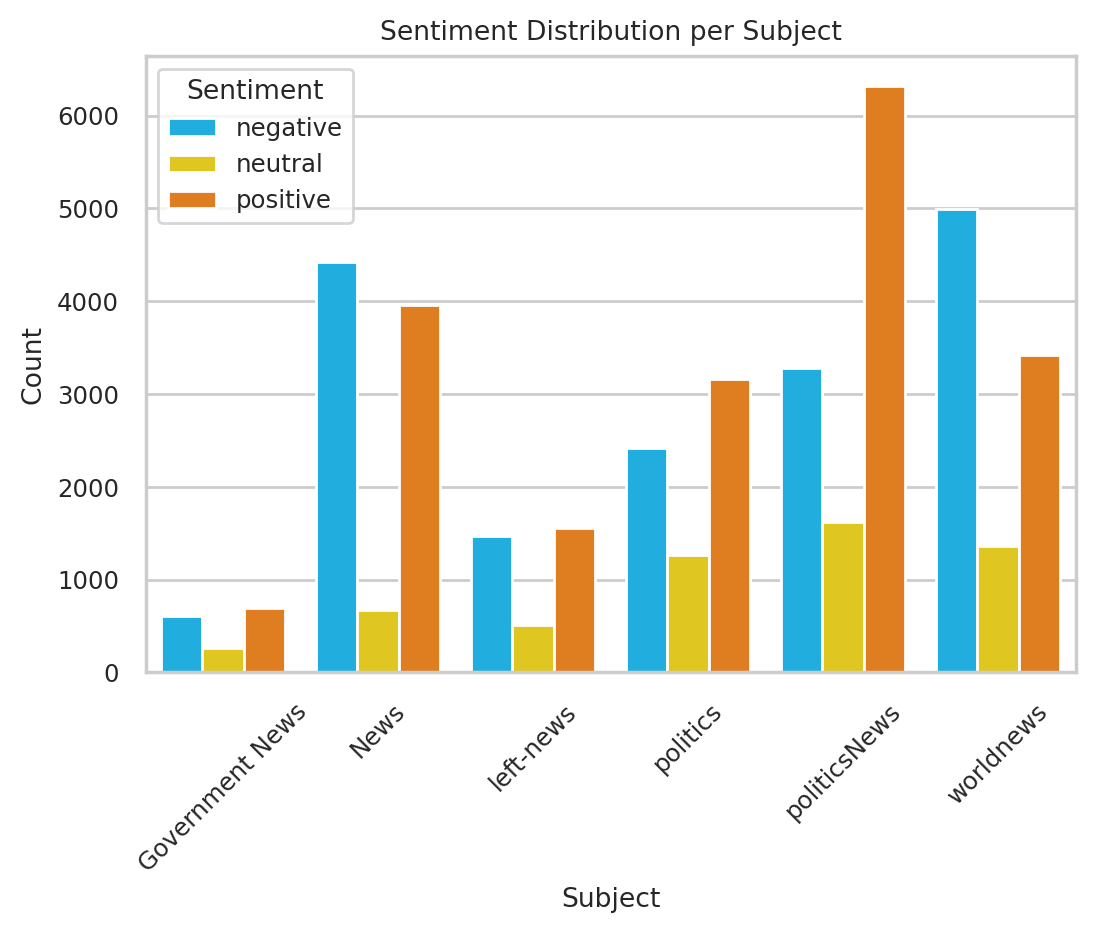

In [ ]:
sentiment_counts = vaders.groupby(['Subject', 'sentiment'])['sentiment'].count().reset_index(name='count')

plt.figure(figsize=(6, 4))
sns.barplot(x='Subject', y='count', hue='sentiment', data=sentiment_counts)

plt.title('Sentiment Distribution per Subject')
plt.xlabel('Subject')
plt.ylabel('Count')

plt.legend(title='Sentiment')

plt.xticks(rotation=45)

plt.show()

# **Preprocesing**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [ ]:
df1 = vaders.copy()

In [ ]:
df1['content'] = df1['Title'] + ' ' + df1['Text']

In [ ]:
X = df1['content']
y = df1['Label']

In [ ]:
text_lengths = X.apply(lambda x: len(x.split(" ")))

## **Data Scaling**

In [ ]:
#Scaling "Label"
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df1['content'].values.reshape(-1, 1), df1['Label'])
X_res = X_res.flatten()

In [ ]:
tokenizer = Tokenizer(num_words=50000, oov_token='OOV')
tokenizer.fit_on_texts(X_res)
sequences = tokenizer.texts_to_sequences(X_res)
padded = pad_sequences(sequences, maxlen=1000)

## **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, y_res, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# **Model**

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=50000, output_dim=16, input_length=1000))
model.add(SimpleRNN(64, activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 16)          800000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5184      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 805249 (3.07 MB)
Trainable params: 805249 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

weights_path = '/content/drive/MyDrive/NLP_course_AF/model_weights.h5'
loading_model = False
if loading_model:
  model.load_weights(weights_path)
else:
  # Define the checkpoint callback
  checkpoint = ModelCheckpoint(weights_path, save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')

  # Define the early stopping callback
  early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

  # Fit the model with both callbacks
  history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping, checkpoint])

Epoch 1/20
919/919 [==============================] - 392s 422ms/step - loss: 0.3339 - accuracy: 0.8642 - val_loss: 0.1705 - val_accuracy: 0.9405
Epoch 2/20
919/919 [==============================] - 384s 418ms/step - loss: 0.1308 - accuracy: 0.9553 - val_loss: 0.0968 - val_accuracy: 0.9686
Epoch 3/20
919/919 [==============================] - 383s 416ms/step - loss: 0.0826 - accuracy: 0.9730 - val_loss: 0.1270 - val_accuracy: 0.9592
Epoch 4/20
919/919 [==============================] - 385s 419ms/step - loss: 0.0939 - accuracy: 0.9713 - val_loss: 0.0829 - val_accuracy: 0.9730
Epoch 5/20
919/919 [==============================] - 379s 413ms/step - loss: 0.0492 - accuracy: 0.9839 - val_loss: 0.0817 - val_accuracy: 0.9722
Epoch 6/20
919/919 [==============================] - 383s 417ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0702 - val_accuracy: 0.9754
Epoch 7/20
919/919 [==============================] - 386s 421ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0858 -

In [ ]:
evaluation_result = model.evaluate(X_test, y_test)

print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

197/197 [==============================] - 12s 63ms/step - loss: 0.0666 - accuracy: 0.9781
Test Loss: 0.06664790213108063
Test Accuracy: 0.9780952334403992


In [ ]:
if loading_model:
    plt.figure(figsize=(6, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
model.predict(X_test)

197/197 [==============================] - 17s 84ms/step


array([[0.9997349 ],
       [0.02801644],
       [0.9999998 ],
       ...,
       [0.89121735],
       [0.9795579 ],
       [0.99999994]], dtype=float32)

In [ ]:
predictions = model.predict(X_test)  # Assuming this returns probabilities

# Applying the threshold
# For binary classification, assuming the output is a single probability per instance
binary_predictions = np.where(predictions > 0.5, 1, 0)

197/197 [==============================] - 26s 133ms/step


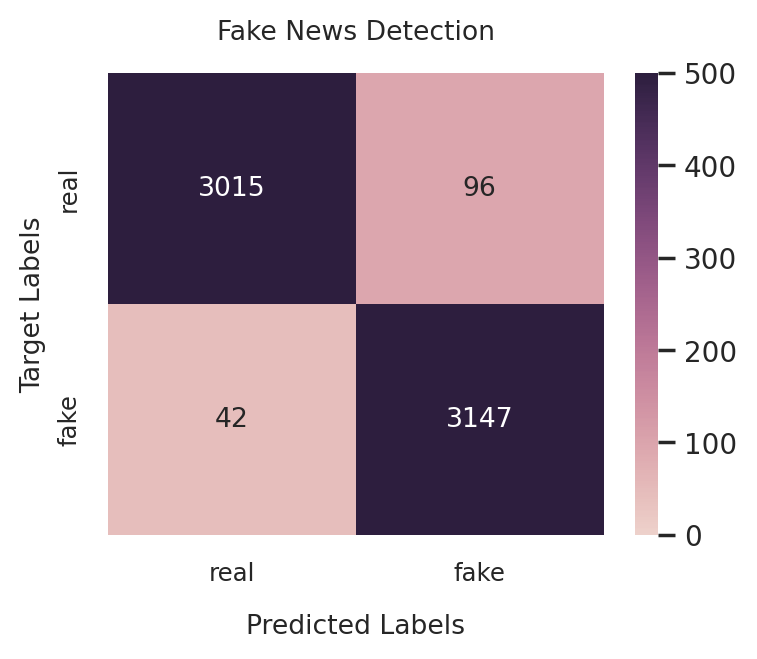

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)



# Plot confusion matrix
plt.figure(figsize=(4, 3))
# Define the custom palette
custom_palette = sns.cubehelix_palette( as_cmap=True)
# Define custom font dictionary for title and labels


# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=['real', 'fake'], yticklabels=['real', 'fake'],vmin=0,vmax=500,)

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels')
heatmap.set_ylabel('Target Labels')
heatmap.set_title('Fake News Detection', pad=12)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels())
heatmap.set_yticklabels(heatmap.get_yticklabels())

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space


plt.show()

# **LLM**

In [ ]:
def make_prediction_on_text(txt, model=model):
  d = {'content': [txt]}
  gpt_gen = pd.DataFrame(data=d)
  x_gpt = gpt_gen['content'].values.reshape(-1, 1)
  x_gpt = x_gpt.flatten()
  xg_seq = tokenizer.texts_to_sequences(x_gpt)
  xg_pad = pad_sequences(xg_seq, maxlen=1000)
  # print(xg_pad)
  return model.predict(xg_pad)

In [ ]:
def make_prediction_on_df(address, model=model):
  gpt_gen = pd.read_csv(address)
  gpt_gen['content'] = gpt_gen['text'].apply(lambda x: clean(x))
  gpt_gen['label'] = 1
  # gpt_gen['Title'] = gpt_gen['Title'].apply(lambda x: clean(x))
  # gpt_gen['content'] = gpt_gen['Title'] + " " + gpt_gen['Text']

  x_gpt = gpt_gen['content'].values.reshape(-1, 1)
  x_gpt = x_gpt.flatten()
  xg_seq = tokenizer.texts_to_sequences(x_gpt)
  xg_pad = pad_sequences(xg_seq, maxlen=1000)
  # print(xg_pad)
  return model.evaluate(xg_pad, np.array(gpt_gen['label']))

In [ ]:
r = make_prediction_on_df('/content/drive/MyDrive/NLP_course_AF/LLM_generated_news/claude_gen.csv')
print("Test Loss:", r[0])
print("Test Accuracy:", r[1])

1/1 [==============================] - 1s 528ms/step - loss: 3.4721 - accuracy: 0.2188
Test Loss: 3.4721262454986572
Test Accuracy: 0.21875


In [ ]:
r = make_prediction_on_df('/content/drive/MyDrive/NLP_course_AF/LLM_generated_news/gpt_gen.csv')
print("Test Loss:", r[0])
print("Test Accuracy:", r[1])

2/2 [==============================] - 0s 91ms/step - loss: 2.2481 - accuracy: 0.5000
Test Loss: 2.248133897781372
Test Accuracy: 0.5
